In [100]:
##PROJECT Question:
##is there a way to use a fourier transformation (preferably FFT) on a signal with missing 
##values and get an (at least almost) correct spectrum for small frequency values
##while retaining the other information?

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
## Read Data
mainDF = pd.read_csv('data/master_table_smirice_v2.csv')
mainDF = mainDF[['DateTime', 'DE']]
print("Percent missing data: {}%".format((int(mainDF['DE'].isna().sum())/int(mainDF.shape[0]))*100))
mainDF['DateTime'] = pd.to_datetime(mainDF['DateTime'])
# mainDF.index = mainDF['DateTime']
mainDF['t']=0
mainDF


Percent missing data: 56.4850136239782%


,DateTime,DE,t
0,2019-06-24 18:00:00,70.05,0
1,2019-06-24 20:00:00,NaN,0
2,2019-06-24 22:00:00,69.76,0
3,2019-06-25 00:00:00,NaN,0
4,2019-06-25 02:00:00,70.02,0
...,...,...,...
3665,2020-06-23 02:00:00,62.45,0
3666,2020-06-23 04:00:00,NaN,0
3667,2020-06-23 06:00:00,64.77,0
3668,2020-06-23 10:00:00,64.77,0


In [102]:
##Note that we have ~54% of missing DE values
##Let's see what our sampling rate is

##Method purpose: treat sampling rate => standard

##1. treat time Datetime to total minute
##2. Calculate sampling rate in Hz -> microHertz I guess
##3. DF treatment to standardized Hz

#TODO: initialize sampling time range
#      standard engineered way of doing this

#set_time_range

## Checking for bad rows
## Bad row is defined as when Hertz between two rows is not normalized
bad_index=[]
bad_values=[]
for i, row in mainDF.iterrows():
    time_range = (mainDF['DateTime'].iloc[i+1]-mainDF['DateTime'].iloc[i]).total_seconds()
    if (time_range != 7200.0):
        
        bad_index.append(i+1)
        bad_values+=[time_range]
    # line = pd.DataFrame({"DateTime": mainDF['DateTime'].iloc[i]+timedelta(hours=4), "DE": np.nan, "t":0, "Sampling_rate":0}, index=[i+1])
    # mainDF = pd.concat([mainDF.iloc[:i], line, mainDF.iloc[i:]]).reset_index(drop=True)

    if i == len(mainDF) - 2:
        break
    
# mainDF = mainDF.drop(1827)
# mainDF
# bad_index
print(bad_values)
len(bad_values)



[14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 21600.0, 14400.0, 1404000.0, 21600.0, 3600.0, 3600.0, 14400.0, 14400.0, 21600.0, 32400.0, 3600.0, 14400.0, 28800.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 21600.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 36000.0, 21600.0, 14400.0, 21600.0, 14400.0, 14400.0, 316800.0, 28800.0, 14400.0, 14400.0, 14400.0, 14400.0, 3600.0, 10800.0, 14400.0, 14400.0, 21600.0, 14400.0, 115200.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 21600.0, 14400.0, 21600.0, 14400.0, 10800.0, 3600.0, 21600.0, 14400.0, 50400.0, 14400.0, 14400.0, 14400.0, 14400.0, 21600.0, 18000.0, 3600.0, 14400.0, 14400.0, 14400.0, 21600.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 21600.0, 14400.0, 14400.0, 14400.0, 14400.0, 21600.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 14400.0, 21600.0, 14400.0, 14

237

In [75]:
## Note that we have 202 bad rows
##
## Function to insert row in the dataframe 
def Insert_row_(row_number, df, row_value): 
    # Slice the upper half of the dataframe 
    df1 = df[0:row_number] 
    
    # Store the result of lower half of the dataframe 
    df2 = df[row_number:]
    
    # Inser the row in the upper half dataframe 
    df1.loc[row_number]=row_value 
   
    # Concat the two dataframes 
    df_result = pd.concat([df1, df2]) 
   
    # Reassign the index labels 
    df_result.index = [*range(df_result.shape[0])] 
   
    # Return the updated dataframe 
    return df_result 

In [64]:
for j in bad_index:        
    row_value = [mainDF['DateTime'].iloc[j-1]+timedelta(hours=4), np.nan, 0,0]
    print(j, row_value)
    if j > mainDF.index.max()+1: 
        print("Invalid row_number") 
    else: 
        # Let's call the function and insert the row 
        # at the second position 
        mainDF = Insert_row_(j, mainDF, row_value)
            


mainDF.head(15)

9 [Timestamp('2019-06-13 20:00:00'), nan, 0, 0]
21 [Timestamp('2019-06-15 18:00:00'), nan, 0, 0]
41 [Timestamp('2019-06-19 06:00:00'), nan, 0, 0]
47 [Timestamp('2019-06-20 04:00:00'), nan, 0, 0]
51 [Timestamp('2019-06-20 16:00:00'), nan, 0, 0]
58 [Timestamp('2019-06-21 20:00:00'), nan, 0, 0]
62 [Timestamp('2019-06-22 08:00:00'), nan, 0, 0]
69 [Timestamp('2019-06-23 10:00:00'), nan, 0, 0]
86 [Timestamp('2019-06-26 08:00:00'), nan, 0, 0]
93 [Timestamp('2019-06-27 08:00:00'), nan, 0, 0]
123 [Timestamp('2019-07-02 08:00:00'), nan, 0, 0]
143 [Timestamp('2019-07-05 14:00:00'), nan, 0, 0]
149 [Timestamp('2019-07-06 10:00:00'), nan, 0, 0]
155 [Timestamp('2019-07-07 06:00:00'), nan, 0, 0]
157 [Timestamp('2019-07-07 10:00:00'), nan, 0, 0]
162 [Timestamp('2019-07-08 04:00:00'), nan, 0, 0]
178 [Timestamp('2019-07-11 00:00:00'), nan, 0, 0]
181 [Timestamp('2019-07-11 10:00:00'), nan, 0, 0]
188 [Timestamp('2019-07-12 10:00:00'), nan, 0, 0]
189 [Timestamp('2019-07-12 14:00:00'), nan, 0, 0]
192 [Timest

/Users/ktrinh/Applications/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


 [Timestamp('2019-08-14 14:00:00'), nan, 0, 0]
303 [Timestamp('2019-08-14 18:00:00'), nan, 0, 0]
305 [Timestamp('2019-08-14 18:00:00'), nan, 0, 0]
306 [Timestamp('2019-08-14 22:00:00'), nan, 0, 0]
307 [Timestamp('2019-08-15 02:00:00'), nan, 0, 0]
317 [Timestamp('2019-08-16 06:00:00'), nan, 0, 0]
321 [Timestamp('2019-08-17 02:00:00'), nan, 0, 0]
325 [Timestamp('2019-08-17 14:00:00'), nan, 0, 0]
326 [Timestamp('2019-08-17 18:00:00'), nan, 0, 0]
329 [Timestamp('2019-08-18 02:00:00'), nan, 0, 0]
330 [Timestamp('2019-08-18 06:00:00'), nan, 0, 0]
335 [Timestamp('2019-08-18 20:00:00'), nan, 0, 0]
349 [Timestamp('2019-08-21 16:00:00'), nan, 0, 0]
356 [Timestamp('2019-08-23 00:00:00'), nan, 0, 0]
365 [Timestamp('2019-08-28 06:00:00'), nan, 0, 0]
384 [Timestamp('2019-08-31 14:00:00'), nan, 0, 0]
395 [Timestamp('2019-09-02 08:00:00'), nan, 0, 0]
423 [Timestamp('2019-09-07 04:00:00'), nan, 0, 0]
428 [Timestamp('2019-09-07 20:00:00'), nan, 0, 0]
429 [Timestamp('2019-09-08 00:00:00'), nan, 0, 0]
432

,DateTime,DE,t,Sampling_rate
0,2019-06-12 08:00:00,NaN,0,0
1,2019-06-12 12:00:00,64.82,0,0
2,2019-06-12 16:00:00,NaN,0,0
3,2019-06-12 20:00:00,NaN,0,0
4,2019-06-13 00:00:00,NaN,0,0
5,2019-06-13 04:00:00,NaN,0,0
6,2019-06-13 08:00:00,NaN,0,0
7,2019-06-13 12:00:00,NaN,0,0
8,2019-06-13 16:00:00,NaN,0,0
9,2019-06-13 20:00:00,NaN,0,0


In [55]:
##populate sampling rate and delta time in seconds
for i, row in mainDF.iterrows():
    mainDF['t'] = (mainDF['DateTime'].iloc[i+1]-mainDF['DateTime'].iloc[i]).total_seconds()
    mainDF['Sampling_rate'].iloc[i] = (1/(mainDF['DateTime'].iloc[i+1]-mainDF['DateTime'].iloc[i]).total_seconds())*1E6
    if i == len(mainDF) - 2:
        break
        
## print('average sampling rate: {} microHz'.format(mainDF['Sampling_rate'].mean()))
mainDF

/Users/ktrinh/Applications/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ZeroDivisionError: float division by zero

66


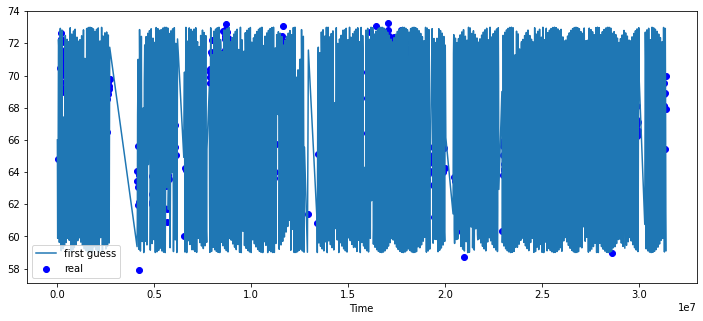

In [82]:
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

data = np.array(mainDF['DE'].astype(float))
t = np.array(mainDF['t'].astype(int))



##let's guess the data
guess_mean = 66
guess_std = 7
guess_phase = 0
guess_freq = 1
guess_amp = 1

print(guess_mean)
# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

plt.figure(figsize=(12,5))
plt.xlabel('Time')

# ax1 = mainDF['DE'].plot(color='blue', grid=True, label='real')
ax1 = plt.scatter(t, data, color='blue', label='real')
ax2 = plt.plot(t, data_first_guess, label='first guess')


# h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()


plt.legend()
# plt.legend(h1, l1, loc=2)
plt.show()

[ 0.          0.01257895  0.0251579   0.03773685  0.0503158   0.06289475
  0.0754737   0.08805265  0.1006316   0.11321055  0.1257895   0.13836845
  0.15094739  0.16352634  0.17610529  0.18868424  0.20126319  0.21384214
  0.22642109  0.23900004  0.25157899  0.26415794  0.27673689  0.28931584
  0.30189479  0.31447374  0.32705269  0.33963164  0.35221059  0.36478954
  0.37736849  0.38994744  0.40252639  0.41510534  0.42768429  0.44026323
  0.45284218  0.46542113  0.47800008  0.49057903  0.50315798  0.51573693
  0.52831588  0.54089483  0.55347378  0.56605273  0.57863168  0.59121063
  0.60378958  0.61636853  0.62894748  0.64152643  0.65410538  0.66668433
  0.67926328  0.69184223  0.70442118  0.71700013  0.72957907  0.74215802
  0.75473697  0.76731592  0.77989487  0.79247382  0.80505277  0.81763172
  0.83021067  0.84278962  0.85536857  0.86794752  0.88052647  0.89310542
  0.90568437  0.91826332  0.93084227  0.94342122  0.95600017  0.96857912
  0.98115807  0.99373702  1.00631597  1.01889491  1

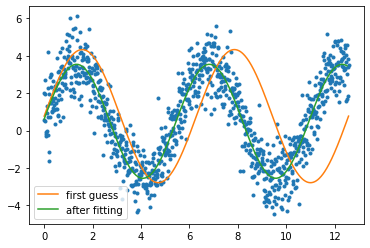

In [13]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise
print(t)
guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

In [14]:
import pandas as pd
import math as math
mainDF = pd.DataFrame()
x = [1,2,4,8,16,32,64]
f1= []
f2 = []
f3 = []
for i in x:
    f1.append(i**3)
    f2.append(math.log2(i))
    f3.append(i*math.log2(i))
    
    
mainDF['f1'] = f1
mainDF['f2'] = f2
mainDF['f3'] = f3
mainDF

if mainDF['f1'].sum() > mainDF['f2'].sum():
    mainDF = mainDF[['f2','f1']]
    
mainDF

,f2,f1
0,0.0,1
1,1.0,8
2,2.0,64
3,3.0,512
4,4.0,4096
5,5.0,32768
6,6.0,262144


In [1]:
from scipy.stats import skew, kurtosis, kstest

#kurtosis: measures normally distributed data tail weighted extremities
#low kurtosis -> tail ends of a given distribution are less extreme compared to normal distribution
#high kurtosis -> tail ends of a given distribution are more extreme compared to normal distribution

#skewness: differentiates extreme values in one versus the other tail
#skewness value greater than zero means that there is more weight in the right tail of the distribution
def getUniformityStats(data):
    kurtosis = kurtosis(data)
    skewness = skew(data)
    return kurtosis, skewness


#ks test on single sample against an observable
#basically test to see if pulled data is consistent with original distribution
def ks_range_test(data):
    D,p = kstest(data, 'norm')
    return D,p

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

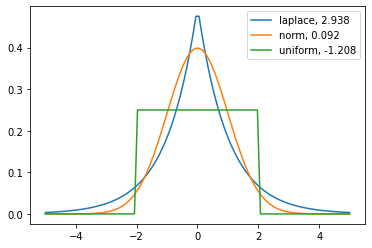

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
#test set
x = np.linspace(-5, 5, 100)
print(x)

ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']



for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()